In [539]:
 # Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [494]:
# Reading whale returns, set path for csv file
whale_data = Path("C:/Users/owner/Documents/git/homework/Module 4/whale_returns.csv")

# Read in the data into Pandas DataFrames, set date as index
whale_df=pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [495]:
#count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [496]:
#identify null records
whale_df.isnull().mean()*100


SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [497]:
#drop null records
whale_df = whale_df.dropna().copy()

In [498]:
#verify nulls dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [500]:
# Check Data Types
whale_df.dtypes


SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [501]:

# Reading algorithmic returns, set path for csv file
algo_data = Path("C:/Users/owner/Documents/git/homework/Module 4/algo_returns.csv")

# Read in the data into Pandas DataFrames, set date as index
algo_df=pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [502]:
#count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [503]:
#identify null records
algo_df.isnull().mean()*100


Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [504]:
#drop null records
algo_df = algo_df.dropna().copy()

In [505]:
#verify nulls dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [506]:
# Check Data Types
algo_df.dtypes


Algo 1    float64
Algo 2    float64
dtype: object

In [507]:
# Reading S&P TSX 60 Closing Prices

sp_tsx_data = Path("C:/Users/owner/Documents/git/homework/Module 4/sp_tsx_history.csv")

# Read in the data into Pandas DataFrames, set date as index
sp_tsx_df=pd.read_csv(sp_tsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [508]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [509]:

#remove $ from dataframe (class way 3.2-02)
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")

C:\Users\owner\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [510]:
#Remove commma "," from dataframe
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",","")

In [511]:
#check data types
sp_tsx_df.dtypes

Close    object
dtype: object

In [512]:
#display sp_tsx_df with $ and , removed
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [513]:
#change data type in column 'Close' from object to float
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype('float')

In [514]:
#check data type
sp_tsx_df['Close'].dtype

dtype('float64')

In [515]:
#calculate S&P TSX 60 Daily returns
tsx_daily_return = sp_tsx_df.pct_change()

In [516]:
tsx_daily_return.tail()

,Close
Date,
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003
2019-12-27,-0.000695
2019-12-30,-0.004057


In [517]:
# Rename `Close` Column to be specific to this portfolio.
tsx_daily_return = tsx_daily_return.rename(columns = {
    "Close" : "tsx return"
})

In [520]:
tsx_daily_return.tail()

,tsx return
Date,
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003
2019-12-27,-0.000695
2019-12-30,-0.004057


In [521]:
#sort dataframes by index - Date
whale_df = whale_df.sort_index()
algo_df = algo_df.sort_index()
tsx_daily_return = tsx_daily_return.sort_index()


In [522]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, tsx_daily_return], axis="columns", join="inner"
)

In [523]:
combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


<AxesSubplot:xlabel='Date'>

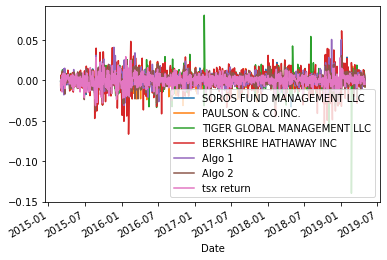

In [524]:
# Plot daily returns of all portfolios
combined_df.plot()

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

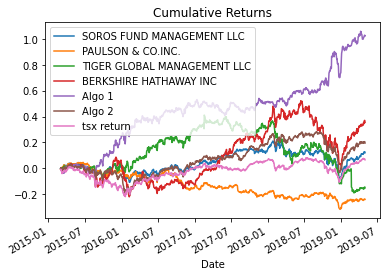

In [525]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1

cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns")

In [526]:
#calculate the daily standard deviation of all portfolios to show a risk analysis
all_portfolio_std = combined_df.std()


<AxesSubplot:title={'center':'Standard Deviation'}>

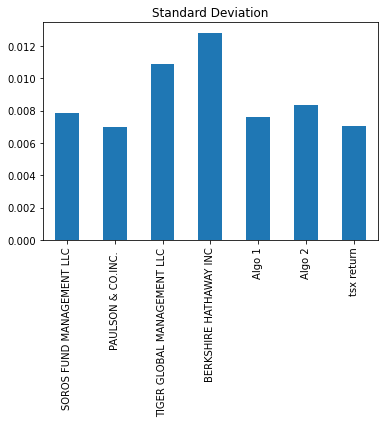

In [527]:
all_portfolio_std.plot.bar(title = "Standard Deviation")

In [528]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx_std = tsx_daily_return.std()

In [529]:
print(tsx_std)

tsx return    0.006637
dtype: float64


In [530]:
print(all_portfolio_std)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
tsx return                     0.007034
dtype: float64


In [531]:
#based on above standard deviation all the portfolios with the exception of PAULSON & CO.INC  
#are risker than the S&P TSX - put in readme ???

# Calculate the annualized standard deviation (252 trading days)
annualized_std = (all_portfolio_std * np.sqrt(252))

print(annualized_std)




SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
tsx return                     0.111664
dtype: float64


In [532]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolio_21_std = combined_df.rolling(window=21).std()



<AxesSubplot:title={'center':'Rolling Standard Deviation 21 day'}, xlabel='Date'>

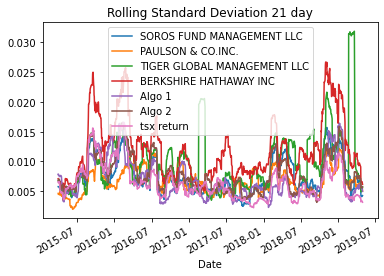

In [534]:
# Plot the rolling standard deviation
all_portfolio_21_std.plot(title = 'Rolling Standard Deviation 21 day')

In [536]:
# Calculate the correlation
correlation = combined_df.corr()

#display correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx return
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
tsx return,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [537]:
# Calculate covariance of a single portfolio - BERKSHIRE HATHAWAY INC

berk_hathaway_covariance = combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df["tsx return"])

In [538]:
# Calculate variance of S&P TSX
variance = combined_df["tsx return"].var()


In [272]:
# Computing beta
berk_hathaway_beta = berk_hathaway_covariance / variance

#display s&p tsx variance and beta value
print(f" S&P variance: {variance}, and BERKSHIRE HATHAWAY INC beta value: {berk_hathaway_beta}")


 S&P variance: 4.9479515915131015e-05, and BERKSHIRE HATHAWAY INC beta value: 1.016043909267547


In [278]:
#calculate 21 day rolling covariance of BERKSHIRE HATHAWAY INC vs. S&P TSX 60
rolling_berk_covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=21).cov(combined_df["tsx return"])

# calculate 21 day rolling variance of S&P TSX 60
rolling_variance = combined_df["tsx return"].rolling(window=21).var()

In [280]:
rolling_beta = rolling_berk_covariance/rolling_variance

<AxesSubplot:title={'center':'Rolling 21 Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

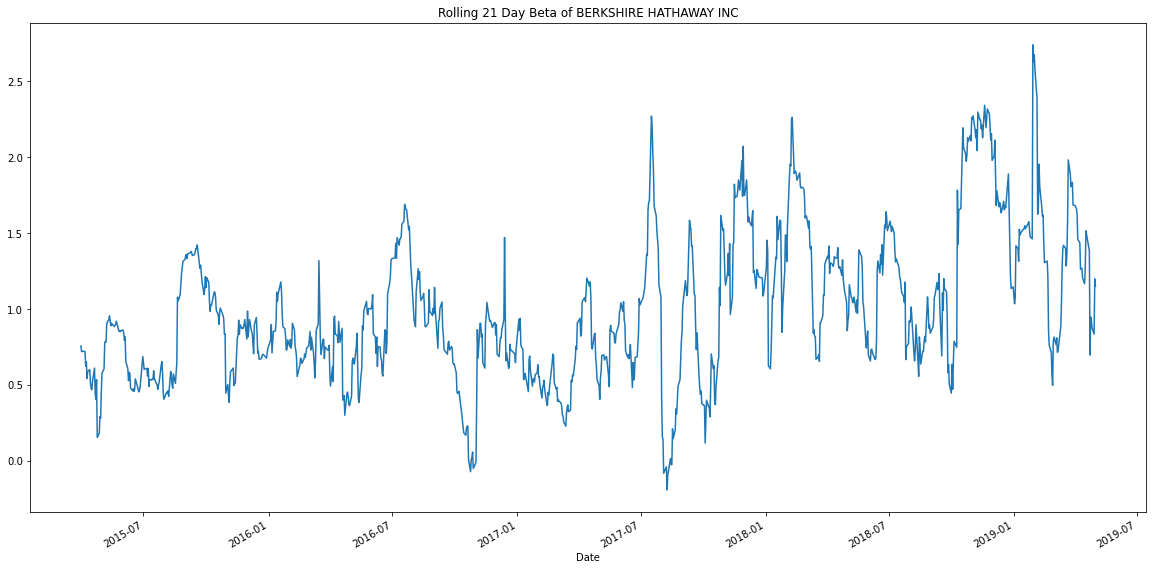

In [282]:
rolling_beta.plot(figsize=(20,10), title='Rolling 21 Day Beta of BERKSHIRE HATHAWAY INC')

In [294]:
# Use `ewm` to calculate the rolling window with 21 day half-life

ewm_combined = combined_df["BERKSHIRE HATHAWAY INC"].ewm(halflife=21).mean()

In [297]:
ewm_combined


Date
2015-03-03   -0.006569
2015-03-04   -0.001089
2015-03-05    0.001603
2015-03-06   -0.002256
2015-03-09   -0.002128
                ...   
2019-04-25    0.001860
2019-04-26    0.002138
2019-04-29    0.002238
2019-04-30    0.002046
2019-05-01    0.001725
Name: BERKSHIRE HATHAWAY INC, Length: 1029, dtype: float64

<AxesSubplot:title={'center':'EWM 21 day rolling window of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

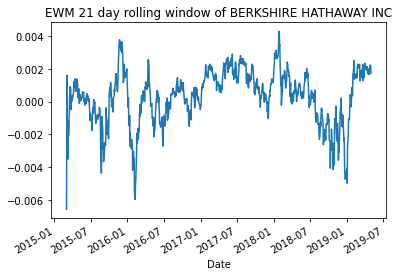

In [300]:
ewm_combined.plot(title='EWM 21 day rolling window of BERKSHIRE HATHAWAY INC')

In [462]:
# Calculate sharpe ratio
sharpe_ratios = (combined_df.mean() * 252) / annualized_std

In [540]:
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
tsx return                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

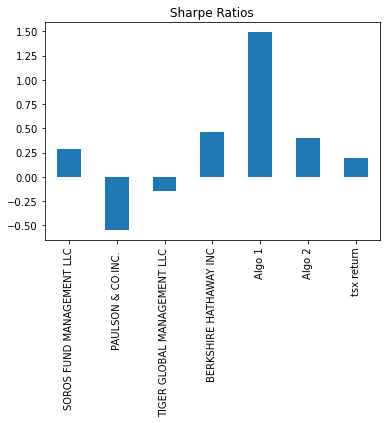

In [464]:
#Bar graph plot of sharpe ratios
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [366]:
#This next part analyzes 3 custom stocks of my own portfolio - I used the given data
# Reading data from 1st stock - 
otex_csv = Path("C:/Users/owner/Documents/git/homework/Module 4/otex_historical.csv")

# Read in the data into Pandas DataFrames, set date as index
otex_df=pd.read_csv(otex_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [367]:
# Reading data from 2nd stock - 
l_historical_csv = Path("C:/Users/owner/Documents/git/homework/Module 4/l_historical.csv")

# Read in the data into Pandas DataFrames, set date as index
l_historical_df=pd.read_csv(l_historical_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [379]:
# Reading data from 3rd stock - 
shop_historical_csv = Path("C:/Users/owner/Documents/git/homework/Module 4/shop_historical.csv")

# Read in the data into Pandas DataFrames, set date as index
shop_historical_df=pd.read_csv(shop_historical_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [362]:
#drop uneccessary columns "Symobol" for this exercise
otex_df= otex_df.drop(columns=["Symbol"])

In [ ]:
#drop uneccessary columns for this exercise
l_historical_df= l_historical_df.drop(columns=["Symbol"])

In [ ]:
#drop uneccessary columns for this exercise
shop_historical_df= shop_historical_df.drop(columns=["Symbol"])

In [401]:
#calculate shop_historical Daily returns
shop_historical_daily_return = shop_historical_df.pct_change()

In [402]:
#calculate otex Daily returns
otex_daily_return = otex_df.pct_change()

In [403]:
#calculate  l_historical Daily returns
l_historical_daily_return = l_historical_df.pct_change()

In [404]:
# Rename `Close` Column to be specific to the portfolios.
otex_daily_return = otex_daily_return.rename(columns = {
    "Close" : "OTEX return"
})

In [410]:
# Rename `Close` Column to be specific to this portfolio.
shop_historical_daily_return = shop_historical_daily_return.rename(columns = {
    "Close" : "shop_historical return"
})

In [406]:
# Rename `Close` Column to be specific to this portfolio.
l_historical_daily_return = l_historical_daily_return.rename(columns = {
    "Close" : "l_historical return"
})

In [412]:
#reset date index using sort dataframes by index - date 
otex_daily_return = otex_daily_return.sort_index()
l_historical_daily_return = l_historical_daily_return.sort_index()
shop_historical_daily_return = shop_historical_daily_return.sort_index()


In [436]:
# Combine all stocks in a single DataFrame

my_combo_df = pd.concat([shop_historical_daily_return, otex_daily_return, l_historical_daily_return], axis="columns", join="inner"
)

In [437]:
my_combo_df


,shop_historical return,OTEX return,l_historical return
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
...,...,...,...
2019-12-20,-0.005503,0.024441,0.003547
2019-12-23,-0.003118,-0.013463,-0.003240
2019-12-24,0.026915,-0.007773,-0.000148


In [438]:
#drop null records
my_combo_df = my_combo_df.dropna().copy()


In [439]:
#verify nulls dropped
my_combo_df.isnull().sum()

shop_historical return    0
OTEX return               0
l_historical return       0
dtype: int64

In [440]:
#display data from custom portfolio
my_combo_df.head()

,shop_historical return,OTEX return,l_historical return
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


In [441]:
# Set weights
weights = [1/3, 1/3, 1/3]


In [442]:
# Calculate portfolio return with given weights
my_combo_returns = my_combo_df.dot(weights)

In [443]:
# Display sample data
my_combo_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

In [444]:
#combine my custom portfolio dataframe with original returns dataframe
big_df = pd.concat([my_combo_df, combined_df], axis="columns", join="inner")

In [445]:
#Display sample data of newly combined dataframe = my custom portfolio + original returns
big_df


,shop_historical return,OTEX return,l_historical return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx return
Date,,,,,,,,,,
2018-01-03,0.023398,-0.011703,-0.010002,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.017092,-0.003715,0.000174,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.001455,-0.007924,0.000000,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.016392,-0.009631,-0.009753,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.011254,-0.000712,0.008969,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.003240,0.006224,0.007398,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.012628,0.000773,-0.003672,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.013173,-0.006181,0.002918,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [446]:
#count nulls
big_df.isnull().sum()

shop_historical return         0
OTEX return                    0
l_historical return            0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
tsx return                     0
dtype: int64

In [447]:
#verify nulls dropped
big_df.isnull().sum()

shop_historical return         0
OTEX return                    0
l_historical return            0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
tsx return                     0
dtype: int64

In [448]:
# Calculate the annualized standard deviation for custom portfolio (252 trading days)
my_combo_annualized_std = (my_combo_df.std() * np.sqrt(252))

In [449]:
#display annualized std
print(my_combo_annualized_std)

shop_historical return    0.488717
OTEX return               0.215132
l_historical return       0.152369
dtype: float64


In [450]:
# Calculate rolling standard deviation with 21 day window for your custom porfolio
my_combo_21_std = my_combo_df.rolling(window=21).std()

<AxesSubplot:title={'center':'Rolling Standard Deviation 21 day- Custom portfolio'}, xlabel='Date'>

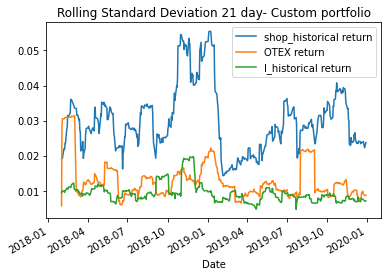

In [451]:
# Plot rolling standard deviation of custom portfolio
my_combo_21_std.plot(title = 'Rolling Standard Deviation 21 day- Custom portfolio')

In [453]:
# Calculate and plot the correlation
my_combo_correlation = my_combo_df.corr()
my_combo_correlation

,shop_historical return,OTEX return,l_historical return
shop_historical return,1.000000,0.398427,0.127501
OTEX return,0.398427,1.000000,0.181266
l_historical return,0.127501,0.181266,1.000000


<AxesSubplot:>

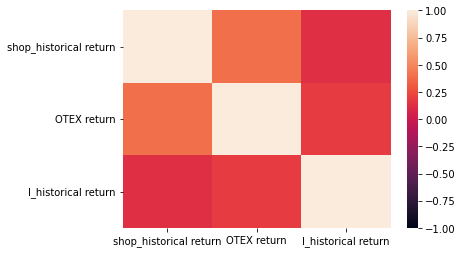

In [458]:
#plot correlation as heatmap
sns.heatmap(my_combo_correlation, vmin=-1, vmax=1)

In [478]:
#calculating covariance
otex_covariance= my_combo_df["OTEX return"].cov(combined_df["tsx return"])
l_historical_covariance=my_combo_df["l_historical return"].cov(combined_df["tsx return"])
shop_historical_covariance=my_combo_df["shop_historical return"].cov(combined_df["tsx return"])

In [480]:
print(otex_covariance)
print(l_historical_covariance)
print(shop_historical_covariance)

4.000212908350892e-05
2.1682609477704833e-05
9.165442524569955e-05


In [481]:
otex_beta=otex_covariance/variance
l_historical_beta=l_historical_covariance/variance
shop_historical_beta=shop_historical_covariance/variance

In [482]:
# Display the beta value of each of my custom portfolio stock
print(f"OTEX: {otex_beta} | l_historical: {l_historical_beta} | shop_historical: {shop_historical_beta}")

OTEX: 0.8084583760302336 | l_historical: 0.4382138563137036 | shop_historical: 1.8523710984341157


In [483]:
#Calculate and plot the 60 day rolling Beta of my custom portfolio compared to S&P 60 TSX
rolling_otex_covariance= big_df["OTEX return"].rolling(window=60).cov(big_df["tsx return"])
rolling_l_historical_covariance= big_df["l_historical return"].rolling(window=60).cov(big_df["tsx return"])
rolling_shop_historical_covariance= big_df["shop_historical return"].rolling(window=60).cov(big_df["tsx return"])

In [484]:
# calculate 60 day rolling variance of S&P TSX 60
rolling_variance_60 = big_df["tsx return"].rolling(window=60).var()

In [485]:
# Calculate 60-day rolling beta of custom portfolio 
rolling_otex_beta= rolling_otex_covariance/rolling_variance_60
rolling_l_historical_beta= rolling_l_historical_covariance/rolling_variance_60
rolling_shop_historical_beta= rolling_shop_historical_covariance/rolling_variance_60

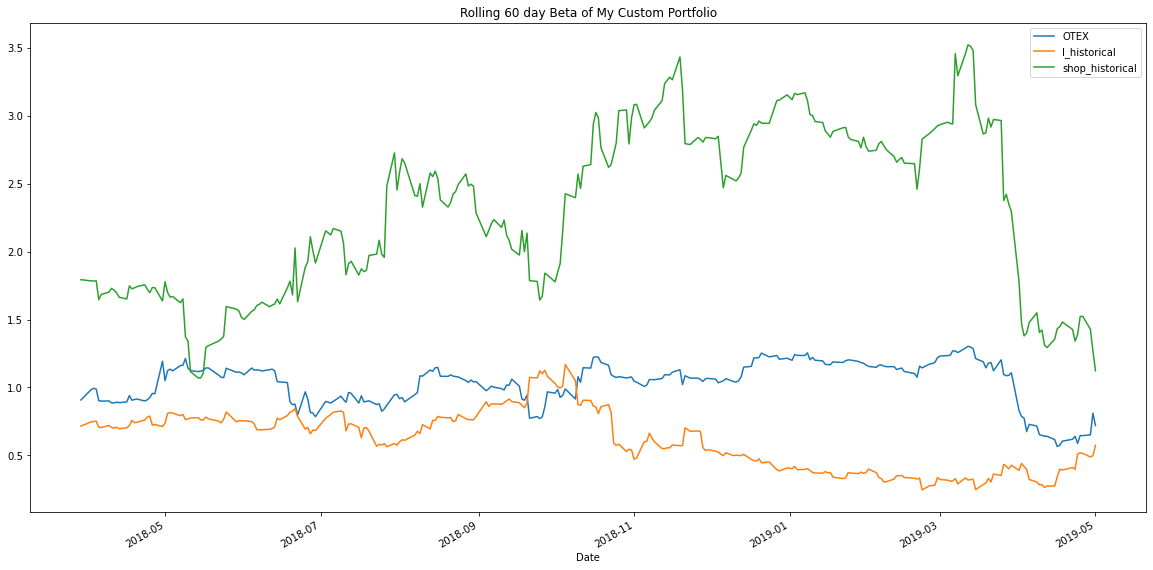

In [486]:
# Plot rolling 60 day rolling beta
ax= rolling_otex_beta.plot(figsize=(20,10), title="Rolling 60 day Beta of My Custom Portfolio")
rolling_l_historical_beta.plot(ax=ax)
rolling_shop_historical_beta.plot(ax=ax)

#set legend of the figure
ax.legend(["OTEX", "l_historical", "shop_historical"])


In [490]:
#Calculated standard deviation and annualized standard deviation of custom portfolio together with whale portfolio
my_combo_std = big_df.std()
my_combo_annualized_std = (my_combo_std*np.sqrt(252))


In [491]:
# Calculate Annualized Sharpe Ratios - 252 trading days
my_sharpe_ratios = big_df.mean()/my_combo_annualized_std

<AxesSubplot:title={'center':'Sharpe Ratios all portfolios'}>

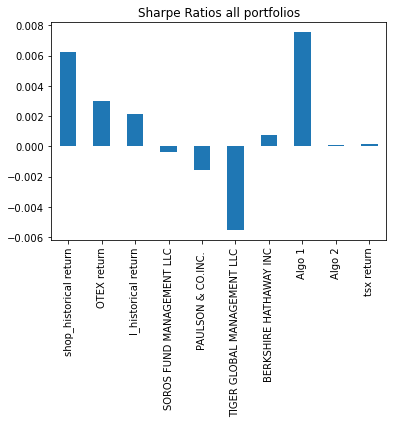

In [492]:
# Visualize the sharpe ratios as a bar plot
my_sharpe_ratios.plot.bar(title="Sharpe Ratios all portfolios")
    
    